In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Генерация выборки для заданных $N$ и $p$: случайно выбираются длины векторов $X_i$, затем для каждого вектора длины $n_i$ генерируется число единиц в нем, имеющее биномиальное распределение $Bin(n_i, p)$. Для $X_i$ так же запоминается значение $I(X_i) = 0$, если в $X_i$ не было единиц и $1$ иначе.

In [2]:
def generate_sample(p, N):
    n = np.random.randint(low=1, high=20, size=N)
    X = np.zeros((N, ))
    I = np.zeros((N, ))

    for i in range(N):
        X[i] = np.random.binomial(n[i], p)
        if (X[i] > 0):
            I[i] = 1
    
    return n, X, I

In [7]:
def solve(f, a, b, eps=10**(-5)):
    c = (b + a) / 2
    while abs(f(c)) > eps:
        if f(c) > 0:
            a = c
        else:
            b = c
        c = (a + b) / 2
    
    return c

In [4]:
def find_estimation(p, N):
    n, X, I = generate_sample(p, N)
    
    # equation to count eml
    eq = lambda x: sum(I / (1 - (1 - x) ** n)) - N
    
    p_est = solve(eq, 0, 1)
    return p_est

In [5]:
def estimate_distr(N, p, n_samples=300):
    est = []
    
    for i in range(n_samples):
        est.append(find_estimation(p, N) / p)
    plt.hist(est)
    plt.title("Оценка плотности распределения при p = {}".format(p))
    plt.show()

Для каждого $p$ из $[0.005, 0.01, 0.3, 0.5, 0.7, 0.99, 0.995]$ было сгенерировано 300 выборок с $N = 1000$. Для каждой выборки была подсчитана оценка для $p$ по методу максимального правдоподобия: $\widehat{p} $.

Для моделирования оценки плотности распределения $\widehat{p}/p$ были построены гистограммы. Из их графиков можно заключить, что __для значений $\textbf{p}$, находящихся близко к граничным значениям (0 и 1), оценки получаются хуже__.

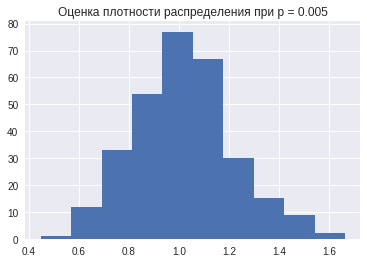

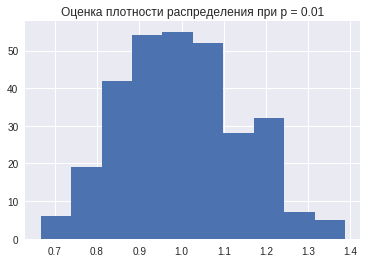

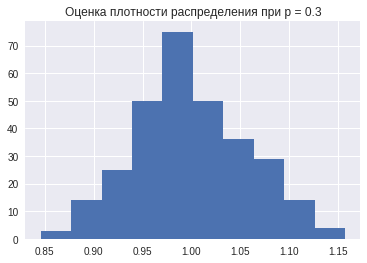

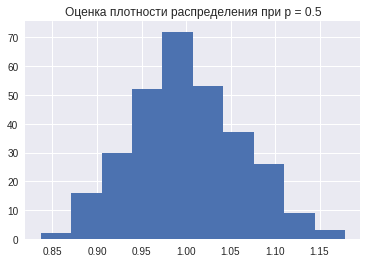

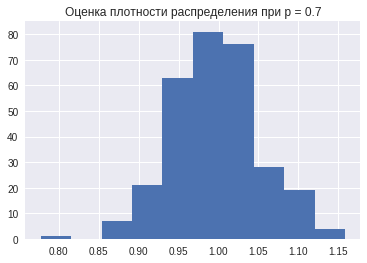

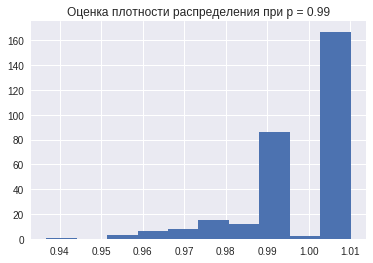

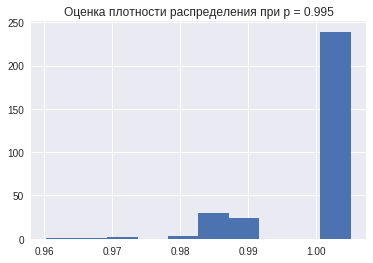

In [10]:
ps = [0.005, 0.01, 0.3, 0.5, 0.7, 0.99, 0.995]
for p in ps:
    estimate_distr(1000, p, 300)